# Классификация клиентов фитнес-центра для анализа причин оттока с применением ML [Яндекс.Практикум]

## Шаг 1. Загрузите данные

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 
import itertools

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

random_state = 1000

In [3]:
try:
    data = pd.read_csv('/datasets/gym_churn.csv')

except:
    data = pd.read_csv('gym_churn.csv')

data.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [5]:
data.describe(include='all')

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


## Шаг 2. Проведите исследовательский анализ данных (EDA)  
1. Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения (пригодится метод describe());  
2. Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался (воспользуйтесь методом groupby());  
3. Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток); 
4. Постройте матрицу корреляций и отобразите её.  

In [6]:
# посмотрим на значения в каждой переменной
col_names = data.columns

for col in col_names:
    print(col)
    print(data[col].value_counts())
    

gender
1    2041
0    1959
Name: gender, dtype: int64
Near_Location
1    3381
0     619
Name: Near_Location, dtype: int64
Partner
0    2053
1    1947
Name: Partner, dtype: int64
Promo_friends
0    2766
1    1234
Name: Promo_friends, dtype: int64
Phone
1    3614
0     386
Name: Phone, dtype: int64
Contract_period
1     2207
12     960
6      833
Name: Contract_period, dtype: int64
Group_visits
0    2351
1    1649
Name: Group_visits, dtype: int64
Age
29    468
30    457
28    447
31    434
27    378
32    364
26    300
33    253
25    231
34    174
24    148
35     98
23     82
36     48
22     33
37     29
21     24
20     14
38     10
39      3
19      2
18      2
41      1
Name: Age, dtype: int64
Avg_additional_charges_total
135.756722    1
97.623617     1
82.487277     1
17.911351     1
74.882931     1
             ..
163.080276    1
133.640108    1
9.838696      1
134.699410    1
357.046942    1
Name: Avg_additional_charges_total, Length: 4000, dtype: int64
Month_to_end_contract
1.0

__Комментарий:__

Среди признаков нет тех, в которых все значения совпадают. При этом в признаке "Promo_friends" - 3614 посетителей поспользовались промокодом от друга, только 386 пришли без промокода. Данный признак может в меньшей степени дифференцировать выборку и является кандидатов на удаление.

Из 4000 клиентов, которые включены в базу, 1061 указаны, как ушедшие в отток и не посещавшие фитнес-центр в текущем месяце

In [7]:
categorical = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits', 'Churn']
numeric = ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month']

gender - не суть важно - пусть 1 это мужчины   
Near_Location - если 1 то живет рядом   
Partner - 1 значит что это сотрудник компании партнера   
Promo_friends - если 1 то значит записывался по акции Приведи друга   
Phone - есть контактный телефон   
Group_visits - посещал ли групповые занятия   
Churn - Если 1 то ушел   


In [8]:
# посмотрим среднее значение признака в двух группах

data.groupby(by='Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


__Комментарий:__

Отдельные признаки показали близкие значения среднего в группах активных посетитетей и "ушедших в отток" (gender, Phone). В других параметрах наблюдается большее количественное расхождение. Статистическая значимость отличий не оценивалась

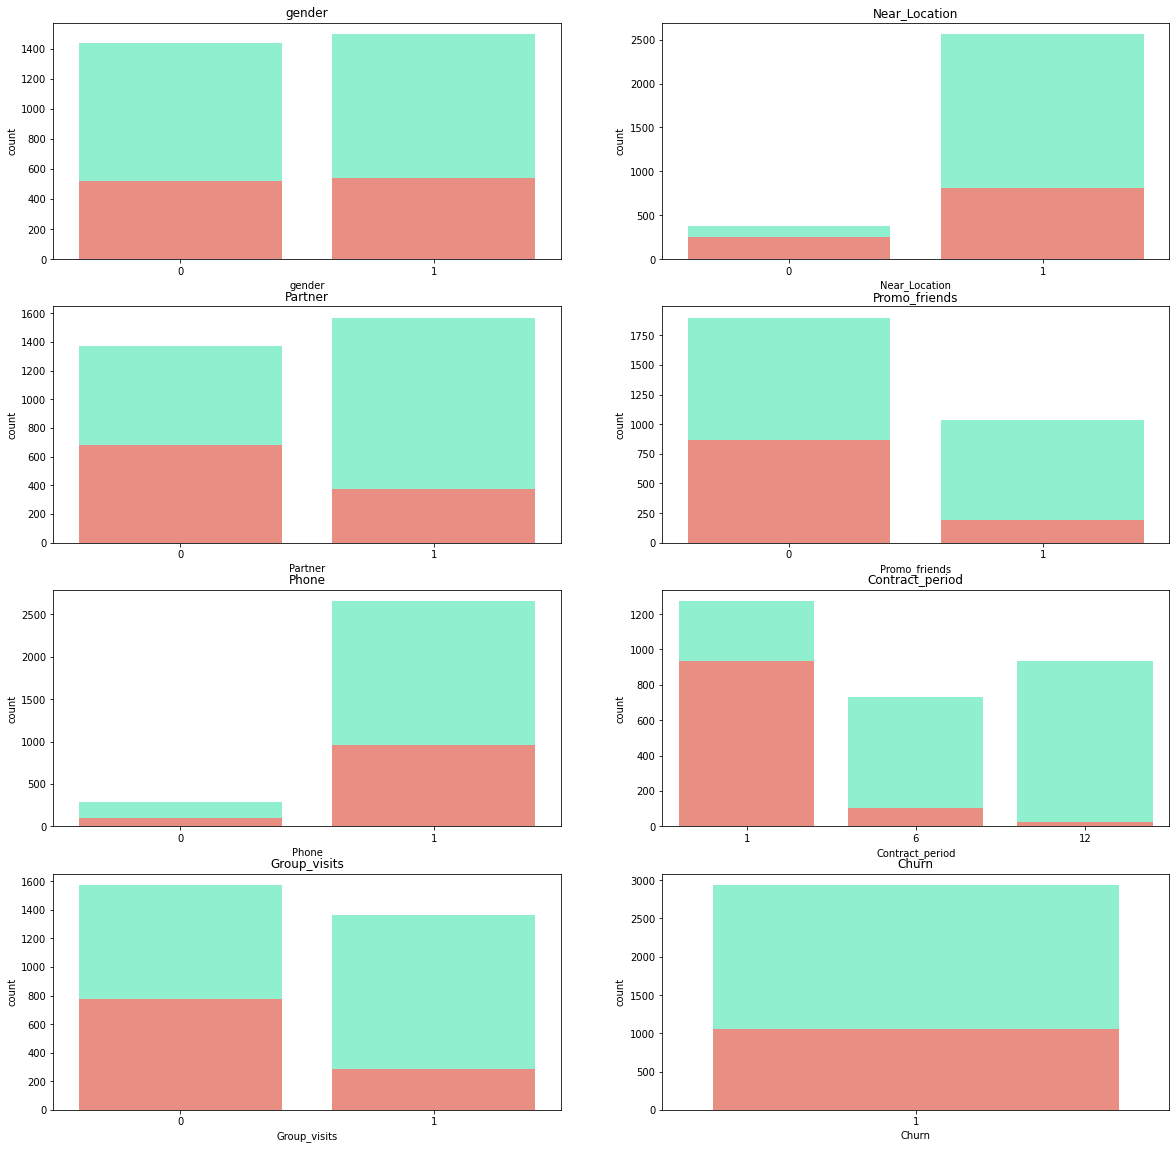

In [9]:
# Постройте столбчатые гистограммы для тех, кто ушёл (отток) и тех, кто остался (не попали в отток) - категориальные признаки
plt.figure(figsize=(20, 20))

for num, col in enumerate(categorical): 
    sns.countplot(data.query('Churn == 0')[col], ax=plt.subplot(4, 2, num+1), color = 'aquamarine') 
    sns.countplot(data.query('Churn == 1')[col], ax=plt.subplot(4, 2, num+1), color = 'salmon') 
    plt.title(col)
plt.show()

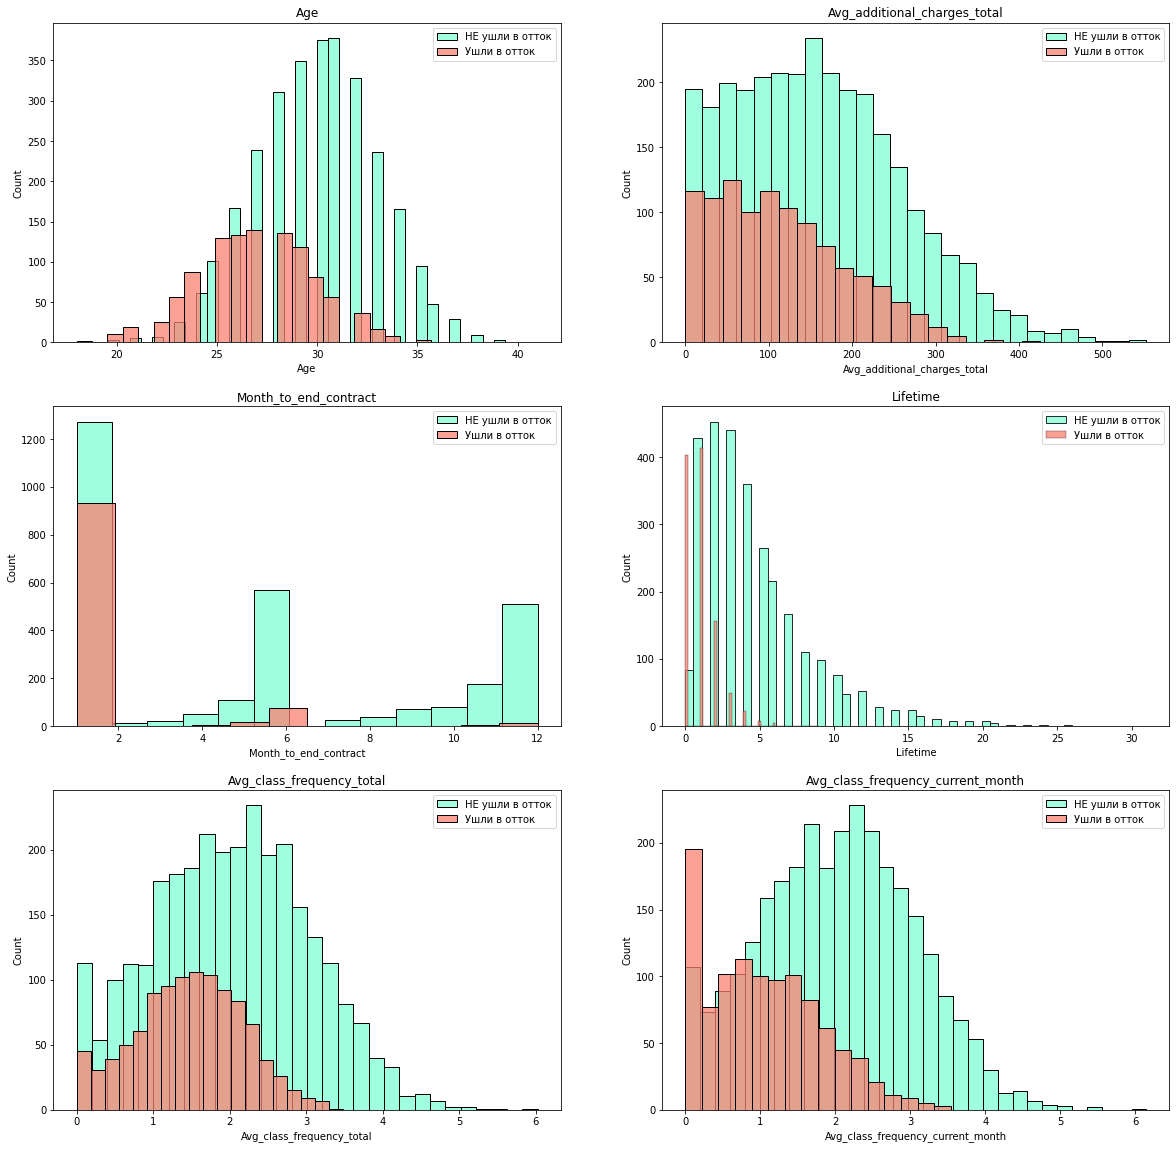

In [10]:

plt.figure(figsize=(20, 20))

for num, col in enumerate(numeric): 
    sns.histplot(data.query('Churn == 0')[col], ax=plt.subplot(3, 2, num+1), color = 'aquamarine') 
    sns.histplot(data.query('Churn == 1')[col], ax=plt.subplot(3, 2, num+1), color = 'salmon') 
    plt.title(col)
    plt.legend(['НЕ ушли в отток', 'Ушли в отток'])
plt.show()

__Комментарий:__

На основании построенных графиков мы видим характер распределения данных в каждом признаке. В большинстве категориальных переменных наблюдается относительный баланс классов.

Количественные переменные имеют очень разное распределение. Например, в переменной 'Month_to_end_contact' наибольшее количество случаев получают значение 1, 6 и 12.

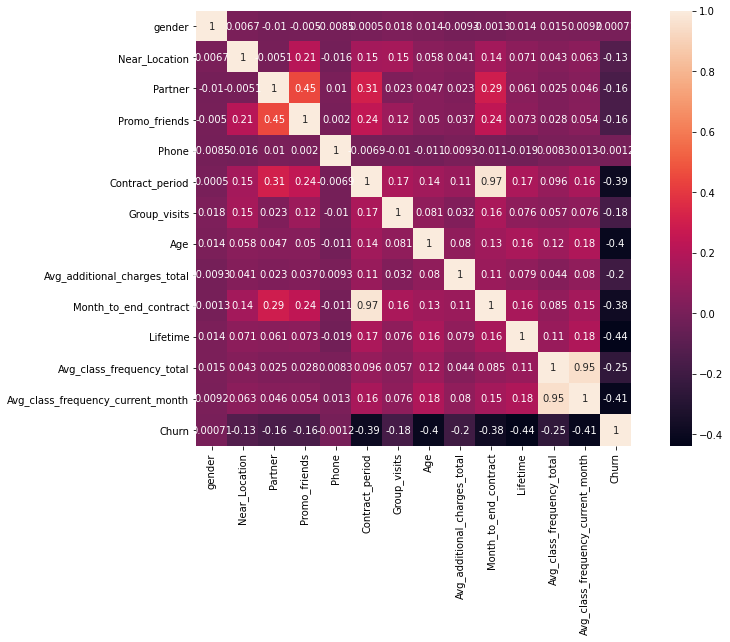

In [11]:
# Постройте матрицу корреляций и отобразите её
plt.rcParams["figure.figsize"] = [14, 8]
corr_m = data.corr()
sns.heatmap(corr_m, annot=True, square=True) 
plt.show()

__Комментарий:__

Наиболее сильная взаимосвязь (выше 0,8) наблюдает между переменными:
- `Contact_period` и `Month_to_end_contact` => оставим в данных переменную `Contact_period`, посколкьу переменная содержит явные категории
- `Avg_class_frequency_total` и `Avg_class_frequency_current_month` => оставим в данных переменную `Avg_class_frequency_total`, поскольку переменная содержит информацию о всех посещениях

Взаимосвязь между переменными и целевой переменной:    
- в качестве целевой переменной рассматривается признак 'churn' -  факт оттока в текущем месяце, где 1 - клиент ушел в отток, 0 - клиент ходил на занятия в течение месяца.   
- на графике heatmap видно, что взаимосвязь переменных с целевой как правило является отрицательной и умеренной, не превышает  |0,41|. Потенциально это может указывать на то, что могут существовать другие параметры, не учтённые в имеющихся данных, которые в большей степени вносят вклад в отток.



## Шаг 3. Постройте модель прогнозирования оттока клиентов
Постройте `модель бинарной классификации клиентов`, где целевой признак — факт оттока клиента в следующем месяце:
1. Разбейте данные на обучающую и валидационную выборку функцией train_test_split().
2. Обучите модель на train-выборке двумя способами:
        - логистической регрессией,   
        - случайным лесом.
5. Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?
6. Не забудьте указать параметр random_state при разделении выборки и задании алгоритма.


In [12]:
y = data['Churn']
X = data.drop(columns=['Churn', 'Avg_class_frequency_current_month', 'Month_to_end_contract'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1000)

In [14]:
X_train.shape

(3200, 11)

In [15]:
X_test.shape


(800, 11)

In [16]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

X_test_st = scaler.transform(X_test)

In [17]:
models = [LogisticRegression(penalty = 'l2', solver='liblinear', max_iter=500, random_state = 1000), RandomForestClassifier()]

In [18]:
# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'accuracy:{:.2f} precision:{:.2f} recall:{:.2f} f1_score:{:.2f} '.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred)
        )
    )


In [19]:
# напишите цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)
    print( )

LogisticRegression(max_iter=500, random_state=1000, solver='liblinear')
accuracy:0.89 precision:0.80 recall:0.78 f1_score:0.79 

RandomForestClassifier()
accuracy:0.88 precision:0.80 recall:0.74 f1_score:0.77 



__Комментарии:__

Более высокие значения recall, f1_score получены для LogisticRegression. Однако, в целом результаты двух алгоритмов очень близки
При разных значениях random_state результаты несколько варьируются. На мой взгляд, это говорит о недостаточном количестве данных.

### Рассмотрим наиболее признаки, вносящие наибольший вклад на основании логистической регрессии

In [20]:
final_model = LogisticRegression(penalty = 'l1', solver='liblinear', max_iter=500)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test) 

# посмотрим, какие признаки в наибольшей степени связаны с тем, что клиенты остаются
coeff = final_model.coef_
coeff=coeff.flatten()
features = pd.DataFrame({'feature':X_train.columns, 'coef':coeff})
print(features.sort_values(by = 'coef', ascending=True))

                         feature      coef
9                       Lifetime -0.986876
10     Avg_class_frequency_total -0.750061
6                   Group_visits -0.715440
3                  Promo_friends -0.496220
7                            Age -0.338251
5                Contract_period -0.326486
4                          Phone -0.242700
1                  Near_Location -0.137105
2                        Partner -0.136296
8   Avg_additional_charges_total -0.005574
0                         gender  0.106653


**Комментарии:**


С удержанием клиентов в наибольшей степени связаны:
- Время прошедшее с момента первого обращения в фитнес-центр
- Среднее количество занятий за весь период
- Факт посещения групповых занятий
- Использование промо акции "приведи друга"
- Возраст (чем младше, чем больше шансов, что уйдет в отток)
- Длительность текущего абонемента

## Шаг 4. Сделайте кластеризацию клиентов
Отложите в сторону столбец с оттоком и `проведите кластеризацию объектов (клиентов)`:
1. Стандартизируйте данные.
2. Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.  
3. Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Договоримся за число  
4. кластеров принять n=5, чтобы ваши результаты можно было сравнивать с результатами остальных студентов. Однако, конечно, в жизни никто не скажет вам правильный ответ, и решение остаётся за вами (на основании изучения графика из предыдущего пункта).  
5. Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?  
6. Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?  
7. Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны? 

In [21]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

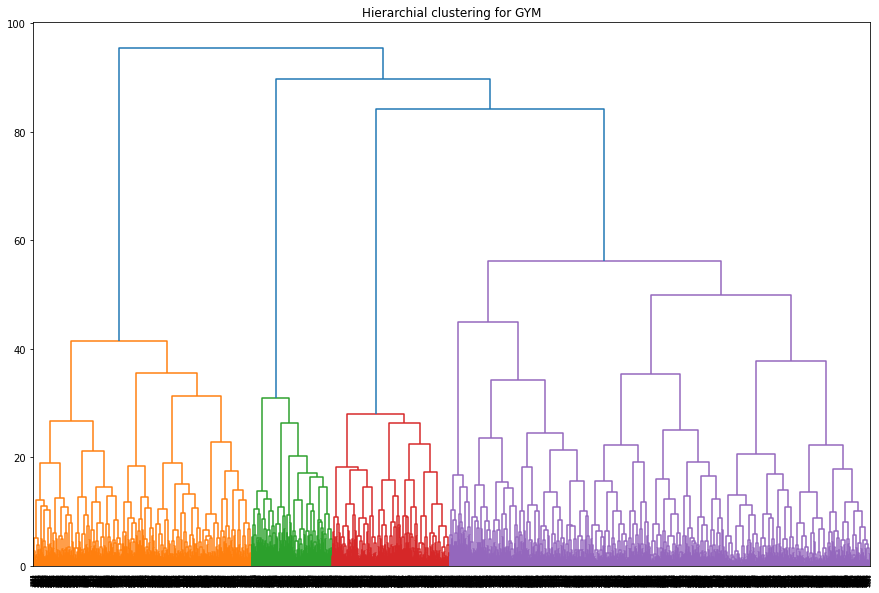

In [22]:
linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

__Комментарии:__
    
На основании построенной дендрограммы у меня складывается впечатление, что может быть имело смысл говорить о четырех кластерах. Но далее мы будем анализировать 5 кластеров как в задании.

In [23]:
# зададим и обучим модель кластеризации
km = KMeans(n_clusters=5, random_state=1000) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

In [24]:
# рассмотрим данные в разрезе кластеров
data['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
data.groupby(by = 'cluster_km').mean().reset_index().T


,0,1,2,3,4
cluster_km,0.000000,1.000000,2.000000,3.000000,4.000000
gender,0.500880,0.537297,0.495984,0.523316,0.500898
Near_Location,1.000000,0.995676,0.994980,0.862694,0.000000
Partner,0.192782,0.414054,0.894578,0.471503,0.488330
Promo_friends,0.057218,0.014054,0.998996,0.305699,0.077199
Phone,1.000000,1.000000,1.000000,0.000000,1.000000
Contract_period,1.963908,6.647568,6.869478,4.777202,2.978456
Group_visits,0.293134,0.544865,0.520080,0.427461,0.231598
Age,27.780810,30.792432,29.526104,29.297927,28.685817
Avg_additional_charges_total,122.935075,177.731121,152.200272,144.208179,137.277472


In [25]:
data.groupby(by = 'Churn', as_index=False).mean()

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,cluster_km
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882,1.638653
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546,1.401508


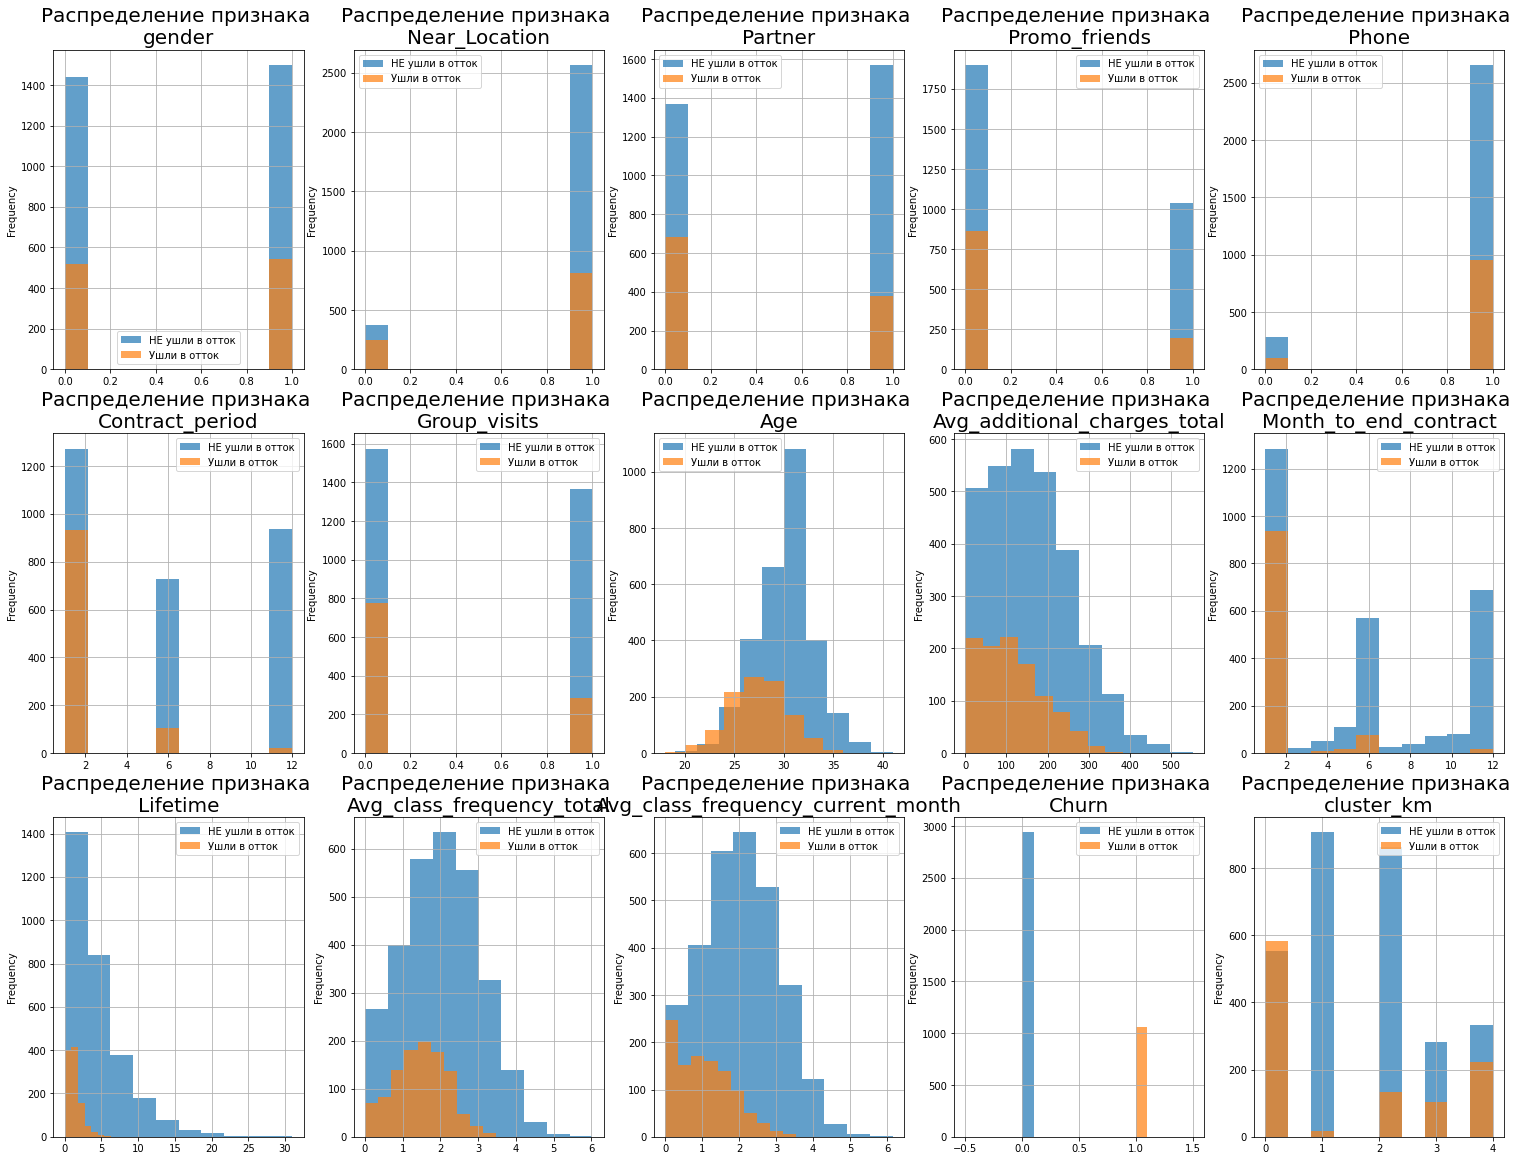

In [26]:
# общее распределение признаков
for i, col in enumerate(data.columns):
    ax = data.groupby(by = 'Churn', as_index=False).plot(
        kind='hist', y=col, grid=True, ax=plt.subplot(3, 5, i+1),figsize=(26,20), legend=False, alpha=0.7)
 
    plt.title(r"Распределение признака "+ "\n"+col, fontsize = 20)
    plt.legend(['НЕ ушли в отток', 'Ушли в отток'])

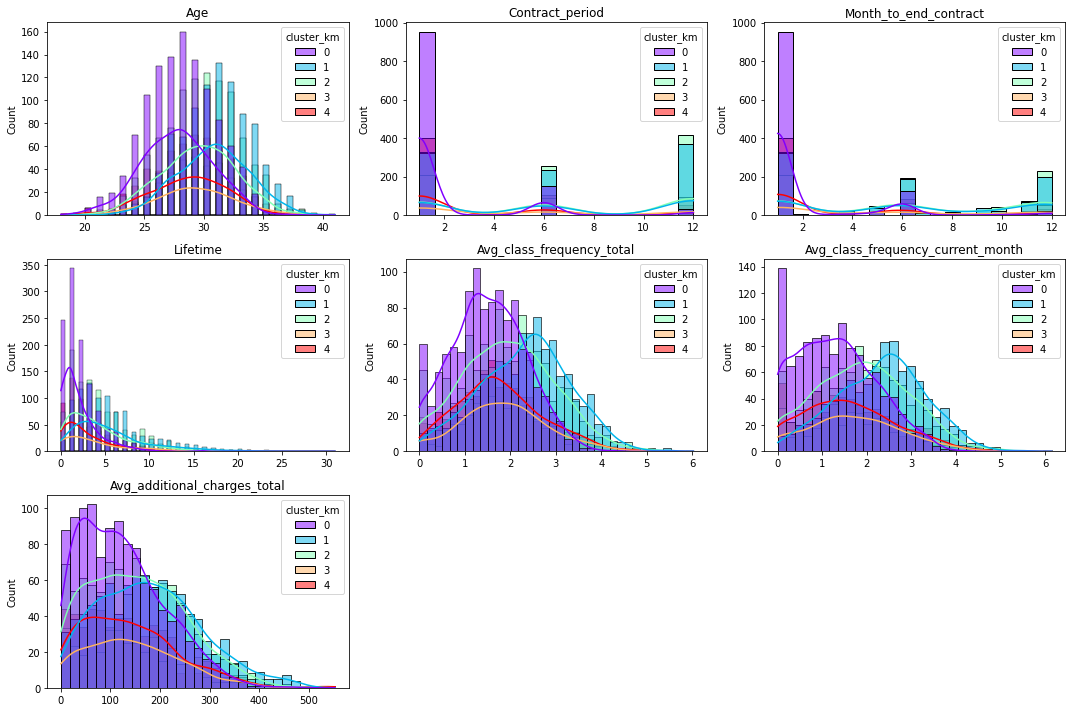

In [32]:
# графики с разбивкой по признаку "cluster"
features = ['Age', 'Contract_period', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month', 'Avg_additional_charges_total']


number_row = int(len(features)/3)
# добавим figsize=(15, 15) чтобы не было слишком мелкие графики
fig, ax = plt.subplots(nrows = number_row + 1, ncols=3, figsize=(15, 10))


# вытягиваем
ax = ax.flatten()

# задаем цикл

for i in range(len(features)):
    
#     добавляем kde = True
    sns.histplot(data = data, x = data[features[i]], hue='cluster_km', ax=ax[i], kde = True, palette='rainbow')

    ax[i].set_title(f'{features[i]}')
    ax[i].set_xlabel('')


# удалим 2 последних, т.к. пустые  
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
            


# чтобы все надписи влезли    
fig.tight_layout()
fig.show()


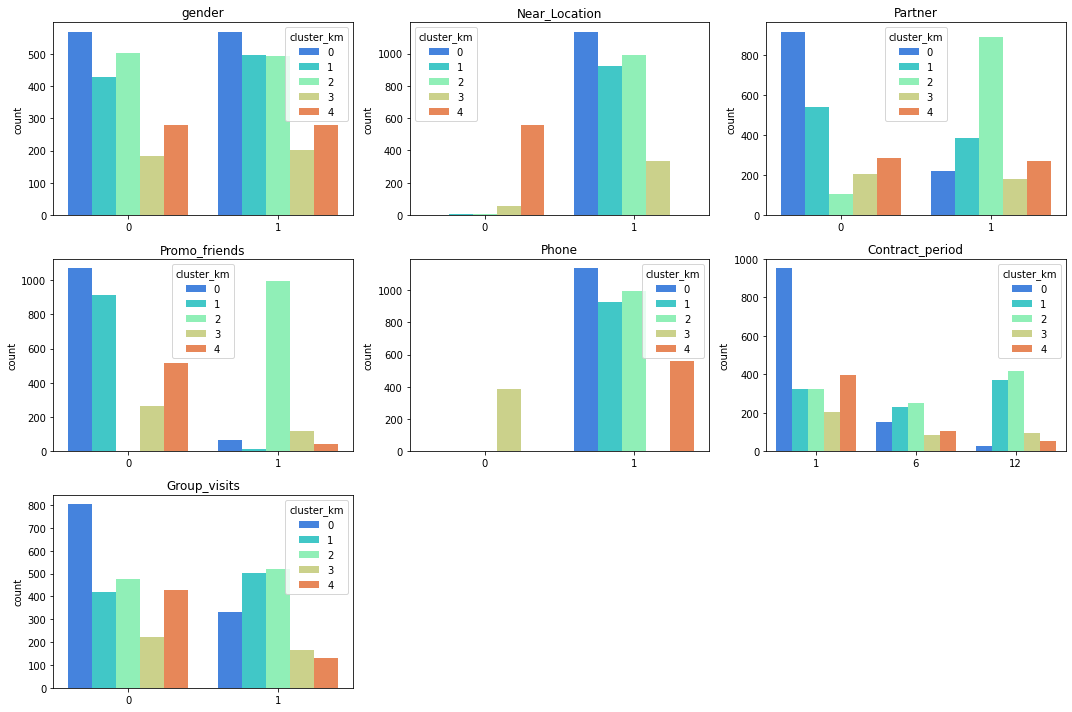

In [31]:
# построим графики для порядковых переменных

categorical = ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Contract_period', 'Group_visits']


number_row = int(len(categorical)/3)
# добавим figsize=(15, 10) чтобы не было слишком мелкие графики
fig, ax = plt.subplots(nrows = number_row + 1, ncols=3, figsize=(15, 10))


# вытягиваем
ax = ax.flatten()

# задаем цикл

for i in range(len(categorical)):
    
#     добавляем kde = True
    sns.countplot(data = data, x = data[categorical[i]], hue='cluster_km', ax=ax[i], palette='rainbow')

    ax[i].set_title(f'{categorical[i]}')
    ax[i].set_xlabel('')


# удалим 2 последних, т.к. пустые  
fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
            


# чтобы все надписи влезли    
fig.tight_layout()
fig.show()


**Описание типичных клиентов:**

По результатам применения кластеризации были получены 5 кластеров клиентов.

Кластеры с наибольшей долей клиентов "в оттоке" : №0(51%),  №4(40%), №3(26%), № 2(13%)    

Кластеры с меньшей долей в оттоке: № 1(менее 2%)    

__Кластер № 0 (включает 51% клиентов, которые ушли в отток)__
- Включает всех клиентов, которые проживают или работают в районе, где находится фитнес-центр.   
- Включает наимеьшую долю клиентов, которые являются сотрудниками компаний партнёров
- Имеют наименьшую среднюю длительность текущего абонемента (менее 2 мес)
- Меньше участвовали в групповыз занятиях
- Меньше оплчивали дополнительные услуги
- У них осталось меньше двух месяцев в среднем до окончания абонемента
- Прошло около 2х месяцев с момента первого посещения
- Средняя частота посещений в неделю 1,3 занятия

__Кластер № 4 (включает 40% клиентов, которые ушли в отток)__
- Включает всех, клиентов, которые живут НЕ в районе фитнес-центра
- Средняя длительность действующего абонемента - менее 3 мес.
- Редко участвовали в групповых занятиях
- Дополнительные затраты в фитнес центре также, не высоки, по сравнению с другими кластерами
- В среднем до кончания действующего абонемента менее 3 месяцев
- Время в момента первого обращения - менее 3 месяцев
- В среднем посещали менее 2 занятий в неделю - 1,76
- в текущем месяце посещали 1.59 занятий

__Опишем кластер № 1 (менее 2%), который содержит наименьший процент оттока__:
- Клиент не использовал промокод друга при первом посещении
- Средняя длительность текущего абонемента более 6 мес
- Часто посещает групповые занятия
- Средний возраст наиболее высокий из всех кластеров 30.7
- Приносит фитнес центру наибольшие средние дополнительную выручку от услуг фитнес-центра
- Имеет наибольшее среднее время с момента обращения
- Посещает фитнес центр в среднем 2,3 раза в неделю (наиболее высокий показатель среди всех кластеров)


Таким образом, параметры, по которым кластеры отличаются связаны в целом с общей длительность с момента первого посещения.
Чем более длительный абонемент у клиента, чем больше раз в неделю клиент посещает фитнес центр, чем больше  тратит на дополнительные услуги - меньше вероятность, что этот клиент уйдёт в отток. Активно посещает групповые тренировки.

Фитнес-центру важно обратить внимание на удержание клиентов со следующими характеристкиами:
- посещают фитнес-центр менее 2 раз в неделю или те, у которых резко сократилось количество посещений в текущем месяце
- почти не посещают групповые занятия
- купили короткий абонемент
- возраст менее 30 лет
- не являются сотрудниками партнёрских организаций

**Предложения по мероприятиям для удержания клиентов, которые могут уйти в отток:**
- Для клиентов с этими характеристиками могут быть предложены дополинтельные акции в большей степени вовлекающие в продолжение посещения. Например, для клиентов с абонементом на месяц, если они посещали фитнес-центр не менее 3 раз каждую неделю, сходили на 5 групповых занятий в течение месяца - предлагать индивидуальные выгодные условия продления на следующий месяц или пол года - заранее. 

- Клиентам, которые не посещают групповые занятия, предложить видео / онлайн вебинар про групповые занятия или экскурсию по залам с групповыми занятиями. Организвать специальное "тестовое" заняти - где за одно занятие показывают примеры активностей из разных занятий, чтобы клиент мог выбрать подходящее для себя

- Делать рассылку клиенту за неделю до окончания месячного абонемента с расписанием и интересными событиями на следующий месяц


## Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами



1. На основании полученных данных построены две модели бинарной классификации клиентов для прогноза отток клиентов. Результаты Логистической регрессии и Случайного леса оказались не устойчивыми. При заданном random_state=1000 немного более высокое значение метрики f1 показывала модель Логистической регрессии.

    На основании модели логистической регрессии определены параметры, в большей мере связанные с сохранением клиентов:

    - Время прошедшее с момента первого обращения в фитнес-центр
    - Среднее количество занятий за весь период
    - Факт посещения групповых занятий
    - Использование промо акции "приведи друга"
    - Возраст (чем младше, чем больше шансов, что уйдет в отток)
    - Длительность текущего абонемента

2. С помощью дендрограммы определено оптимальное количество кластеров и сформированы кластеры клиентов. 
Результаты кластеризации подтвердили выводы о важности параметров, полученные для логистической регрессии.
    
    Фитнес-центру важно обратить внимание на удержание клиентов со следующими характеристкиами:
    - посещают фитнес-центр менее 2 раз в неделю или те, у которых резко сократилось количество посещений в текущем месяце
    - почти не посещают групповые занятия
    - купили короткий абонемент
    - возраст менее 30 лет
    - не являются сотрудниками партнёрских организаций
   

3. Предложения по мероприятиям для удержания клиентов, которые могут уйти в отток:


- Сделать более выгодные условия для приобретения абонемента на 6 месяцев


- Предлагать клиентам, которые пришли в первый раз и купили абонемент на месяц, выгодные условия продления.
Повторять акции по продлению на более длительные период, если клиент взял несколько раз абонемент на месяц.
    
    
- Для клиентов с этими характеристиками могут быть предложены дополнительные акции в большей степени вовлекающие в продолжение посещения. Например, для клиентов с абонементом на месяц, если они посещали фитнес-центр не менее 3 раз каждую неделю, сходили на 5 групповых занятий в течение месяца - предлагать индивидуальные выгодные условия продления на следующий месяц или пол года - заранее. 


- Клиентам, которые не посещают групповые занятия, предложить видео / онлайн вебинар про групповые занятия или экскурсию по залам с групповыми занятиями. Организвать специальное "тестовое" групповое занятие - где за одно занятие показывают примеры активностей из разных занятий и знакомытся с тренерами, чтобы клиент мог выбрать подходящий для себя вариант


- Делать рассылку клиенту за неделю до окончания месячного абонемента, также делать рассылку за месяц и потом за две недели до окончания полугодового и годового абонементов с расписанием и интересными событиями на следующий месяц
